Universidad Galileo

Text Mining and Image Recognition

PAPD - Sección V

Sergio José Barrios Martínez

Carnet No. 19012765

## Hoja de Trabajo No. 2

In [1]:
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
import math

### Problema #1
Desarrolle una función que permita hacer la binarización de una imagen, para realizarlo puede utilizar el enfoque que prefiera.

In [2]:
img = cv2.imread('./Problema1/Benz.jpg')

Se definen las siguientes funciones (**sin utilizar CV2**) para obtener una escala de grises ponderada y la binarización. Ésta última toma como parámetros la imagen, el umbral que define la binarización (valor del pixel para considerarlo 0 ó 255) y si se desea desplegar las imágenes o no (verbose).

In [3]:
def escala_grises(imagen_entrada):
    
    imagen = imagen_entrada.copy()
    ancho, alto, profundidad = imagen.shape
    
    # Escala de Grises (Promedio Ponderado)
    imagen_gris = np.zeros((ancho,alto))
    
    for i in range(0,ancho):
        for j in range(0,alto):
            pixel = imagen[i,j] # RGB
            ponderado = (int(0.299*pixel[0])+int(0.587*pixel[1])+int(0.114*pixel[2]))
            imagen_gris[i,j] = ponderado
    
    return imagen_gris

In [4]:
def binarizacion(imagen,umbral,verbose):
       
    # Conversión a Escala de Grises
    gray = escala_grises(imagen)
    
    # Dimensiones de Imagen de Salida
    ancho, alto = gray.shape
    imagen_bin = np.zeros((ancho,alto),dtype=np.uint8)   
    
    # Binarización pixel a pixel
    for i in range(0,ancho):
        for j in range(0,alto):
            if gray[i,j] > 127:
                pixel = 255
            else:
                pixel = 0
                
            imagen_bin[i,j] = pixel 
    
    # Arreglo de Imágenes
    if verbose:
        plt.figure()
        f, axarr = plt.subplots(1,2,figsize=(20,20))
        axarr[0].title.set_text('Imagen Original')
        axarr[0].imshow(imagen)
        axarr[1].title.set_text('Imagen Binarizada')
        axarr[1].imshow(imagen_bin,cmap="gray")        
      
    return imagen_bin

Llamda a la función de binarización y bajado a disco de imagen binarizada:

True

<Figure size 432x288 with 0 Axes>

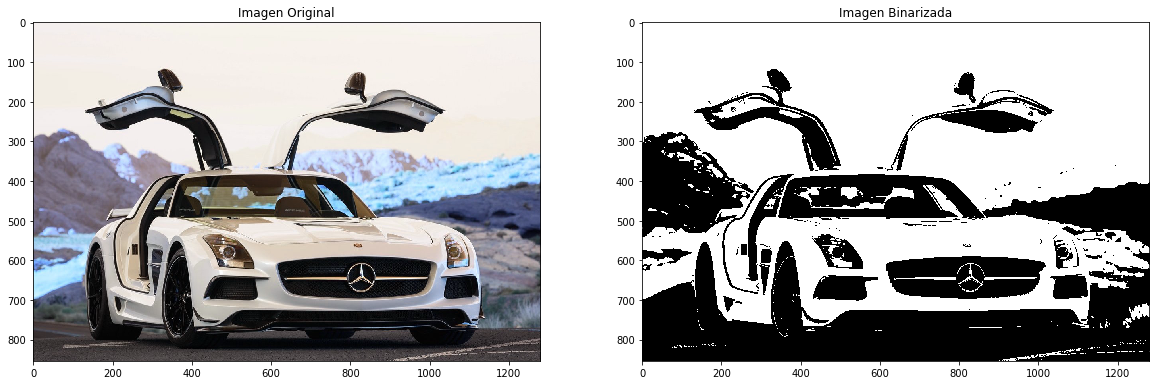

In [5]:
imagen_binarizada = binarizacion(img,127,True)
cv2.imwrite('./Problema1/imagen_binarizada.jpg',imagen_binarizada)

### Problema #2
Desarrolle una función que dada dos imágenes a color, realice las operaciones SUMA, RESTA, AND, OR , XOR con ambas imágenes recuerde que para realizar las operaciones lógicas es necesario pasar la imagen a escala de grises y luego binarizarla.

Para este problema (sin utilizar CV2) se realizaron las siguientes funciones:
- Operaciones aritméticas (suma y resta pixel a pixel de las imágenes de entrada).
- Operaciones lógicas (AND, OR y XOR pixel a pixel sobre las imágenes binarizadas).
- Operaciones: Integra todas las operaciones y muestras las imágenes de salida en una matriz.

In [6]:
def operaciones_aritmeticas(im1,im2):
    
    ancho, alto, profundidad = im1.shape
    imagen_suma = np.zeros((ancho,alto,profundidad),dtype=np.uint8)
    imagen_resta = np.zeros((ancho,alto,profundidad),dtype=np.uint8)
    
    for i in range(0,ancho):
        for j in range(0,alto):           
            for k in range(0,profundidad):
                
                # Suma Ponderada (evita mala definición por saturación)
                pixel_suma = min(int(0.5*im1[i,j,k]) + int(0.5*im2[i,j,k]),255) 
                imagen_suma[i,j,k] = pixel_suma
                # Resta
                pixel_resta = max(int(im1[i,j,k]) - int(im2[i,j,k]),0) 
                imagen_resta[i,j,k] = pixel_resta
    
    return imagen_suma,imagen_resta

In [7]:
def operaciones_logicas(im1,im2):
    
    # Dimensiones de Imagenes Destino
    ancho, alto, profundidad = im1.shape
    imagen_AND = np.zeros((ancho,alto),dtype=np.uint8)
    imagen_OR = np.zeros((ancho,alto),dtype=np.uint8)
    imagen_XOR = np.zeros((ancho,alto),dtype=np.uint8)
    
    # Binarización
    im1_binarizada = binarizacion(im1,127,False)
    im2_binarizada = binarizacion(im2,127,False)
       
    for i in range(0,ancho):
        for j in range(0,alto):           
            
            # AND
            pixel_AND = int(im1_binarizada[i,j]) and int(im2_binarizada[i,j]) # Bitwise AND
            imagen_AND[i,j] = int(pixel_AND)
            
            # OR
            pixel_OR = int(im1_binarizada[i,j]) or int(im2_binarizada[i,j]) # Bitwise OR
            imagen_OR[i,j] = int(pixel_OR)
            
            # XOR
            pixel_XOR = int(im1_binarizada[i,j]) ^ int(im2_binarizada[i,j]) # Bitwise XOR
            imagen_XOR[i,j] = int(pixel_XOR)
    
    return imagen_AND,imagen_OR,imagen_XOR

In [8]:
def operaciones(imagen1,imagen2):
    
    # Operaciones Aritméticas
    imagen_suma,imagen_resta = operaciones_aritmeticas(imagen1,imagen2)
    
    # Operaciones Lógicas
    imagen_AND,imagen_OR,imagen_XOR = operaciones_logicas(imagen1,imagen2)
 
    # Matriz de Subplots(fila,columnas)
    plt.figure()
    f, axarr = plt.subplots(4,2,figsize=(20,20)) 
    
    # Arreglo de Imágenes
    axarr[0][0].title.set_text('Imagen Original 1')
    axarr[0][0].imshow(cv2.cvtColor(imagen1,cv2.COLOR_BGR2RGB))
    axarr[0][1].title.set_text('Imagen Original 2')
    axarr[0][1].imshow(cv2.cvtColor(imagen2,cv2.COLOR_BGR2RGB))
    axarr[1][0].title.set_text('Imagen Suma')
    axarr[1][0].imshow(cv2.cvtColor(imagen_suma,cv2.COLOR_BGR2RGB))
    axarr[1][1].title.set_text('Imagen Resta')
    axarr[1][1].imshow(cv2.cvtColor(imagen_resta,cv2.COLOR_BGR2RGB))
    axarr[2][0].title.set_text('Imagen Bitwise AND')
    axarr[2][0].imshow(imagen_AND,cmap="gray")
    axarr[2][1].title.set_text('Imagen Bitwise OR')
    axarr[2][1].imshow(imagen_OR,cmap="gray")
    axarr[3][0].title.set_text('Imagen Bitwise XOR')
    axarr[3][0].imshow(imagen_XOR,cmap="gray")
   
    return imagen_suma,imagen_resta,imagen_AND,imagen_OR,imagen_XOR

In [9]:
img1 = cv2.imread('./Problema2/Jet.jpg')
img2 = cv2.imread('./Problema2/Birds.jpg')

Llamada a la función Operaciones y bajado a disco de imágenes de salida.

True

<Figure size 432x288 with 0 Axes>

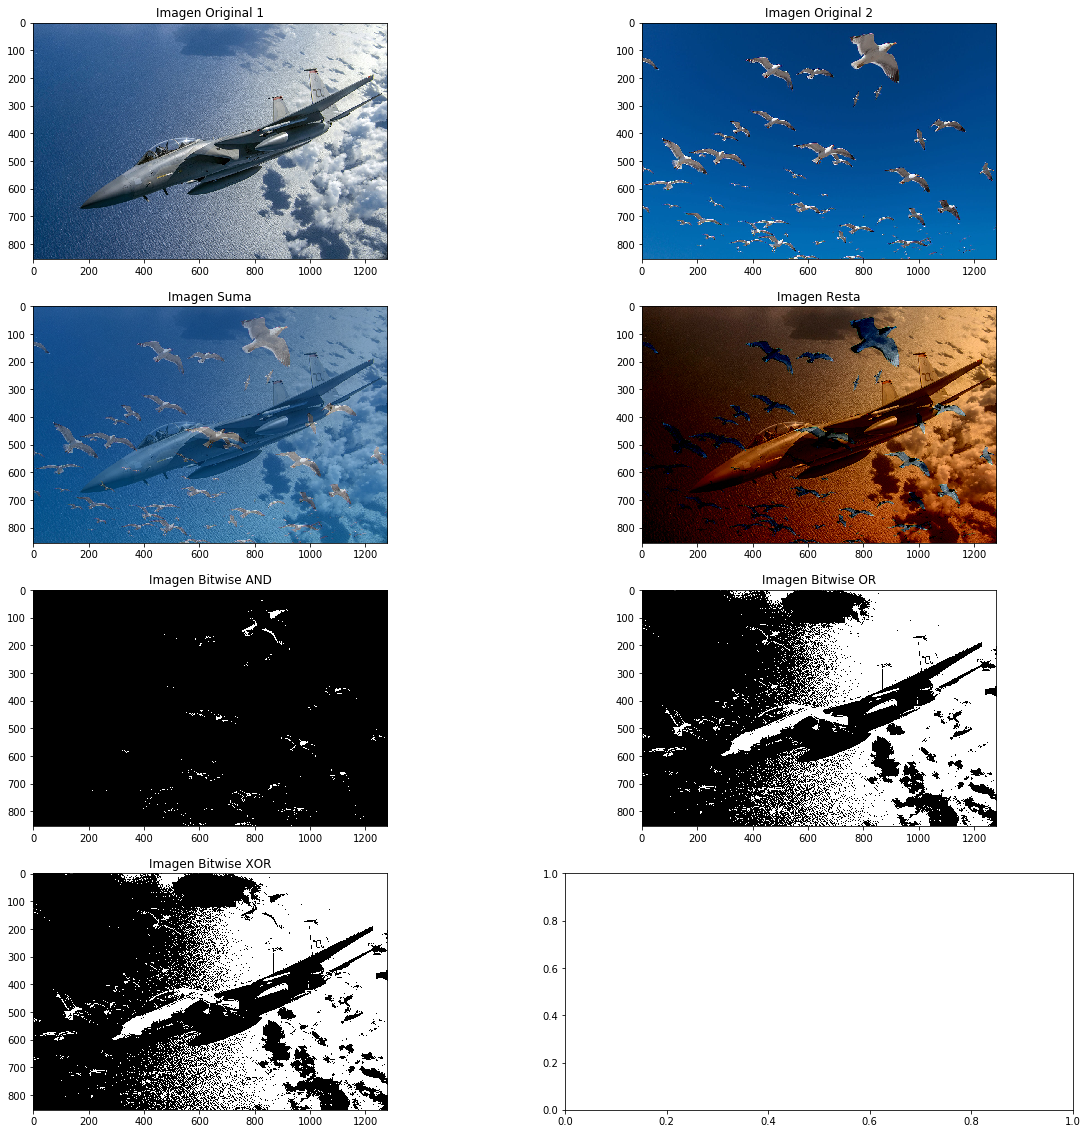

In [10]:
img_suma,img_resta,img_AND,img_OR,img_XOR = operaciones(img1,img2)

cv2.imwrite('./Problema2/img_suma.jpg',img_suma)
cv2.imwrite('./Problema2/img_resta.jpg',img_resta)
cv2.imwrite('./Problema2/img_AND.jpg',img_AND)
cv2.imwrite('./Problema2/img_OR.jpg',img_OR)
cv2.imwrite('./Problema2/img_XOR.jpg',img_XOR)

### Problema #3
Desarrolle una función que dada una imagen en escala de grises muestre dicha imagen en 3 dimensiones, donde los ejes X e Y representan el dominio espacial de la imagen y Z representa la intensidad del color gris de cada pixel.

Lectura de Imagen de disco y conversión a escala de grises:

In [11]:
imagen_1 = cv2.imread('./Problema3/imagen1.jpg')
imagen_1 = escala_grises(imagen_1)

Función de Graficación tridimensional:

In [12]:
def tridimensional(imagen):
      
    # Dimensiones de la Imagen de Entrada
    alto,ancho=np.shape(imagen)

    # Datos para la Gráfica Tridimensional
    zdata = imagen # Intensidades
    xdata = range(ancho) # Rango de pixeles en el ancho
    ydata = range(alto) # Rango de pixeles en el alto
        
    X, Y = np.meshgrid(xdata, ydata)  # Grid de Datos

    # Gráfica Tridimensional de Intensidad
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.title.set_text('Imagen Tridimensional')
    superficie = ax.contourf3D(X, Y, zdata, 50, cmap='inferno')
    ax.set_xlabel('Ancho')
    ax.set_ylabel('Alto')
    ax.set_zlabel('Intensidad')
    fig.colorbar(superficie, ax=ax)

    plt.show()
       
    
    return 0

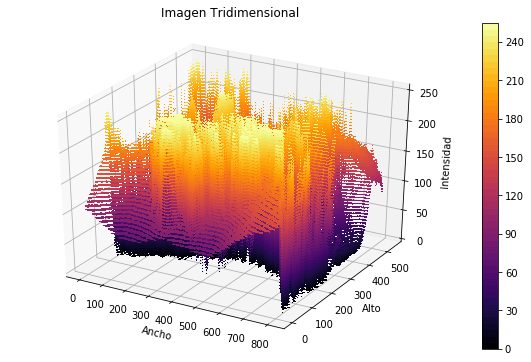

0

In [13]:
tridimensional(imagen_1)

### Problema #4:
Implemente una función para cada una de las trasformaciones vistas en clase: negativa, lineal, logarítmica y exponencial.

In [14]:
imagen_2 = cv2.imread('./Problema4/Benz.jpg')

In [15]:
def negativa(imagen):
    
    # Dimensiones de Imagen
    ancho, alto, profundidad = imagen.shape
    imagen_negativa = np.zeros((ancho,alto,profundidad),dtype=np.uint8)
   
    # Transformación negativa de forma matricial
    imagen_negativa = 255 - imagen
    
    # Comparación Gráfica
    plt.figure()
    f, axarr = plt.subplots(1,2,figsize=(20,20))
    axarr[0].title.set_text('Imagen Original')
    axarr[0].imshow(cv2.cvtColor(imagen,cv2.COLOR_BGR2RGB))
    axarr[1].title.set_text('Imagen Negativa')
    axarr[1].imshow(cv2.cvtColor(imagen_negativa,cv2.COLOR_BGR2RGB))    
    
    return imagen_negativa

True

<Figure size 432x288 with 0 Axes>

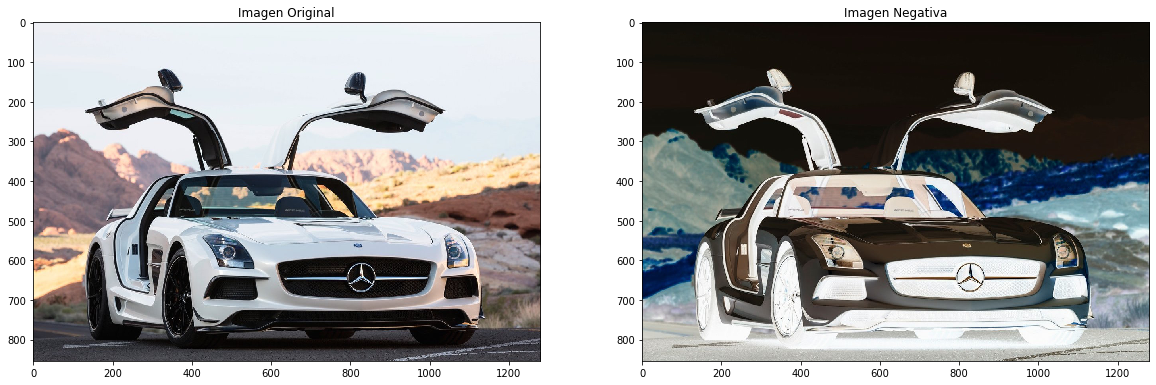

In [16]:
imagen_negativa = negativa(imagen_2)
cv2.imwrite('./Problema4/imagen_negativa.jpg',imagen_negativa)

In [18]:
def lineal(imagen,alpha,beta):
    
    # Dimensiones de Imagen
    ancho, alto, profundidad = imagen.shape
    imagen_lineal = np.zeros((ancho,alto,profundidad),dtype=np.uint8)
    
    for i in range(0,ancho):
        for j in range(0,alto):           
            for k in range(0,profundidad):
                
                # Transformación lineal Alpha*Pixel + Beta
                pixel_lineal = int(alpha*imagen[i,j,k] + beta)
                pixel_lineal = 0 if pixel_lineal < 0 else 255 if pixel_lineal > 255 else pixel_lineal
                imagen_lineal[i,j,k] = pixel_lineal
    
    
    plt.figure()
    f, axarr = plt.subplots(1,2,figsize=(20,20))
    axarr[0].title.set_text('Imagen Original')
    axarr[0].imshow(cv2.cvtColor(imagen,cv2.COLOR_BGR2RGB))
    axarr[1].title.set_text('Imagen Lineal')
    axarr[1].imshow(cv2.cvtColor(imagen_lineal,cv2.COLOR_BGR2RGB))    
    
    return imagen_lineal

True

<Figure size 432x288 with 0 Axes>

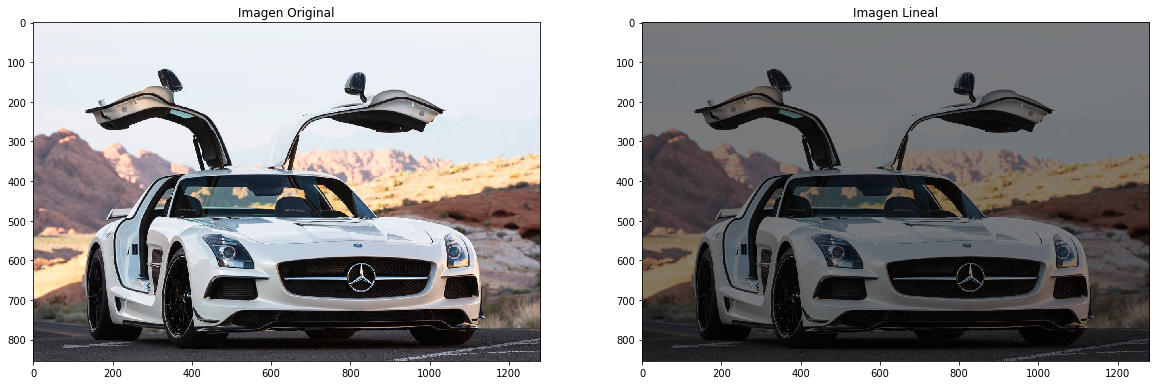

In [19]:
imagen_lineal = lineal(imagen_2,0.5,1)
cv2.imwrite('./Problema4/imagen_lineal.jpg',imagen_lineal)

In [20]:
def logaritmica(imagen,alpha):
    
    # Dimensiones de Imagen
    ancho, alto, profundidad = imagen.shape
    imagen_log = np.zeros((ancho,alto,profundidad),dtype=np.uint8)
    
    for i in range(0,ancho):
        for j in range(0,alto):           
            for k in range(0,profundidad):
                
                # Transformación logarítmica Alpha*log(1+pixel)
                pixel_log = int(alpha*np.log(1+imagen[i,j,k]))
                pixel_log = 0 if pixel_log < 0 else 255 if pixel_log > 255 else pixel_log
                imagen_log[i,j,k] = pixel_log
    
    
    plt.figure()
    f, axarr = plt.subplots(1,2,figsize=(20,20))
    axarr[0].title.set_text('Imagen Original')
    axarr[0].imshow(cv2.cvtColor(imagen,cv2.COLOR_BGR2RGB))
    axarr[1].title.set_text('Imagen Logarítmica')
    axarr[1].imshow(cv2.cvtColor(imagen_log,cv2.COLOR_BGR2RGB))    
    
    return imagen_log

True

<Figure size 432x288 with 0 Axes>

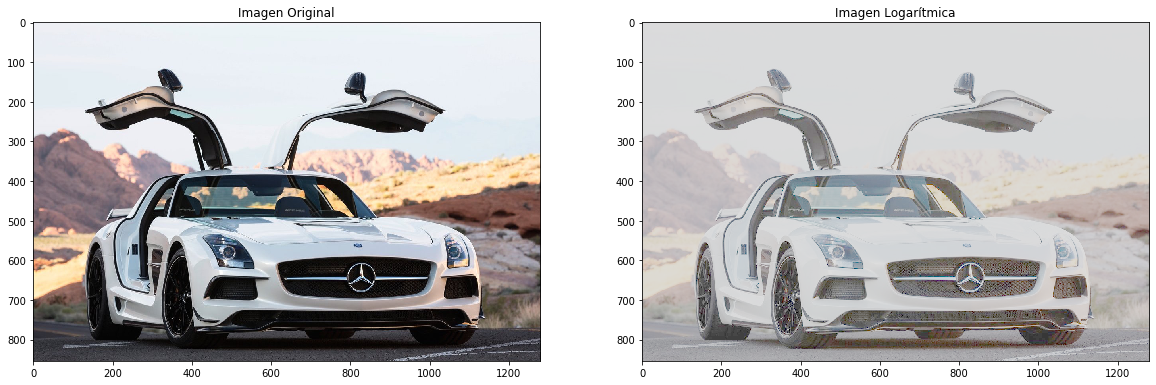

In [21]:
imagen_log = logaritmica(imagen_2,40)
cv2.imwrite('./Problema4/imagen_logaritmica.jpg',imagen_log)

In [22]:
def exponencial(imagen,alpha,gamma):
    
    # Dimensiones de Imagen
    ancho, alto, profundidad = imagen.shape
    imagen_exp = np.zeros((ancho,alto,profundidad),dtype=np.uint8)
    
    for i in range(0,ancho):
        for j in range(0,alto):           
            for k in range(0,profundidad):
                
                # Transformación exponencial Alpha*(pixel)^Gamma
                pixel_exp = int(alpha*(np.power(imagen[i,j,k] / 255,gamma)))
                pixel_exp = 0 if pixel_exp < 0 else 255 if pixel_exp > 255 else pixel_exp
                imagen_exp[i,j,k] = pixel_exp
    
    
    plt.figure()
    f, axarr = plt.subplots(1,2,figsize=(20,20))
    axarr[0].title.set_text('Imagen Original')
    axarr[0].imshow(cv2.cvtColor(imagen,cv2.COLOR_BGR2RGB))
    axarr[1].title.set_text('Imagen Exponencial')
    axarr[1].imshow(cv2.cvtColor(imagen_exp,cv2.COLOR_BGR2RGB))    
    
    return imagen_exp

True

<Figure size 432x288 with 0 Axes>

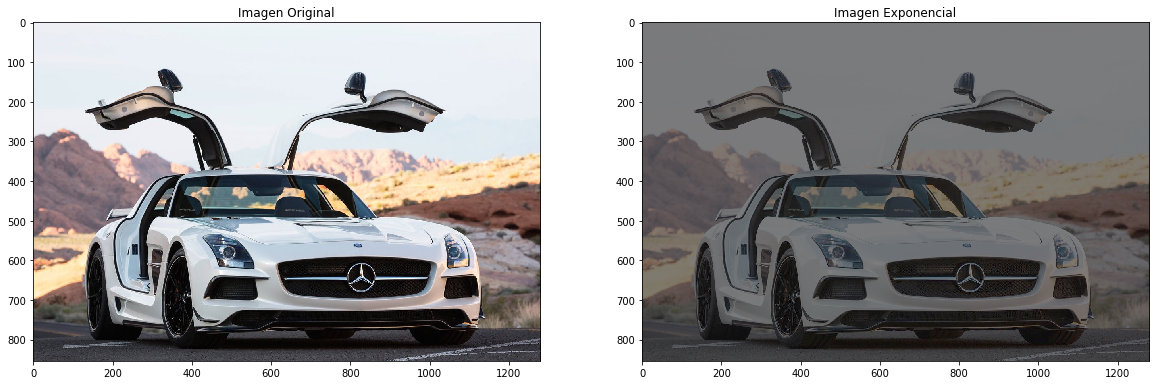

In [23]:
imagen_exp = exponencial(imagen_2,127,0.5)
cv2.imwrite('./Problema4/imagen_exponencial.jpg',imagen_exp)

### Problema Extra - #1:

Desarrolle una función que dada una imagen a color y kernel de cualquier dimensión (3X3, 5X5, 7X7, 9X9, 11X11) y cualquier tipo (gaussiano, Sobel, Sharp, unsharp, laplaciano), aplique un filtro de convolución a dicha imagen y muestre la imagen original y la imagen filtrada. Le recomendamos implementar el kernel como un arreglo de numpy.

In [24]:
imagen_4 = cv2.imread('./ProblemaExtra1/pinup.jpg')
print(imagen_4.shape)

(500, 500, 3)


In [25]:
def ampliar_imagen(imagen_original, tamaño_kernel):
    
    # Dimensiones de Imagen
    ancho = len(imagen_original[0])
    alto = len(imagen_original)
    
    # Se añaden las filas a la imagen original de acuerdo al tamaño del kernel
    # Para ello se usa la función "pad" con valores constantes
    if tamaño_kernel[0] == tamaño_kernel[1]: # El kernel debe ser cuadrado y mayor a 3x3
        if tamaño_kernel[0] >= 3:
            imagen_original = np.pad(imagen_original, tamaño_kernel[0] - 2, mode='constant')
    
    # Se ensambla la matriz ampliada
    matriz = []
    for i in range(0, alto - tamaño_kernel[1] + 1):
        for j in range(0, ancho - tamaño_kernel[0] + 1):
            matriz.append(
                [
                    [imagen_original[columna][fila] for fila in range(j, j + tamaño_kernel[0])]
                    for columna in range(i, i + tamaño_kernel[1])
                ]
            )
    matriz_ampliada = np.array(matriz)
    
    return matriz_ampliada

In [26]:
def filtrar_imagen(matriz_ampliada, kernel):
    
    imagen_filtrada = []
    
    # Se realiza la convolución, por cada sub-matriz de la matriz ampliada
    # el producto punto entre el kernel y la sub-matriz
    for matriz in matriz_ampliada:
        imagen_filtrada.append(
            np.sum(np.multiply(matriz, kernel))
        )
    
    # El arreglo plano obtenido de imagen filtrada, se transforma en matriz cuadrada
    dimension_cuadrada = int(math.sqrt(matriz_ampliada.shape[0]))
    imagen_filtrada = np.array(imagen_filtrada).reshape(dimension_cuadrada, dimension_cuadrada)
    
    return imagen_filtrada

In [27]:
def convolucion(imagen_original,kernel):
    
    imagen_gris = escala_grises(imagen_original)
    imagen_amp = ampliar_imagen(imagen_gris,kernel.shape)
    imagen_trans = filtrar_imagen(imagen_amp,kernel)
    
    plt.figure()
    f, axarr = plt.subplots(1,2,figsize=(20,20))
    axarr[0].title.set_text('Imagen Original')
    axarr[0].imshow(cv2.cvtColor(imagen_original,cv2.COLOR_BGR2RGB))
    axarr[1].title.set_text('Imagen Filtrada')
    axarr[1].imshow(imagen_trans,"gray")
    
    return(imagen_trans)
    

True

<Figure size 432x288 with 0 Axes>

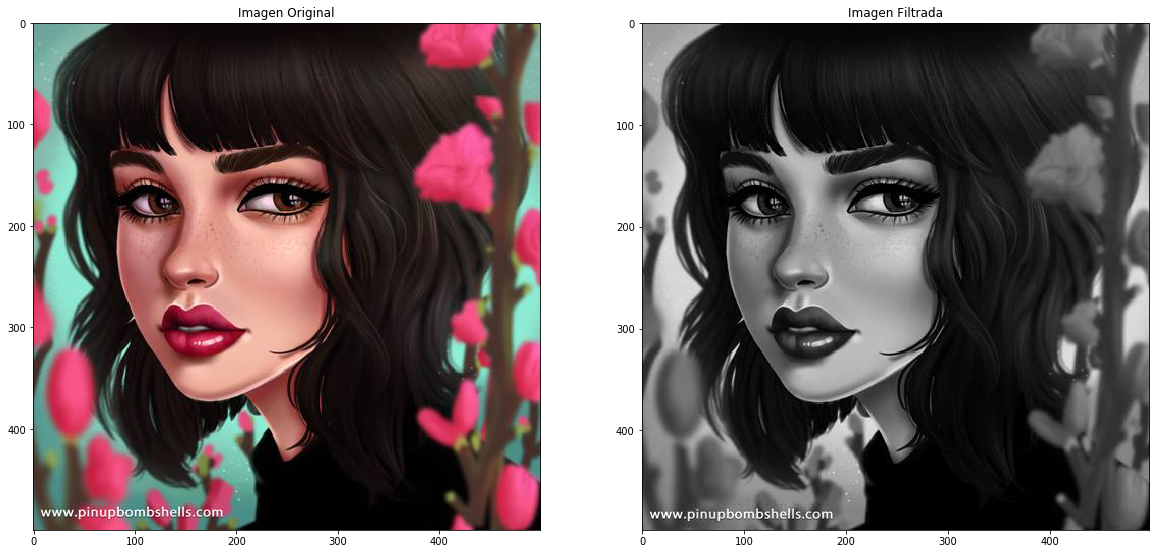

In [28]:
kernel_identidad = np.array([[0,0,0],[0,1,0],[0,0,0]])
imagen_identidad = convolucion(imagen_4,kernel_identidad)
cv2.imwrite('./ProblemaExtra1/imagen_identidad.jpg',imagen_identidad)

True

<Figure size 432x288 with 0 Axes>

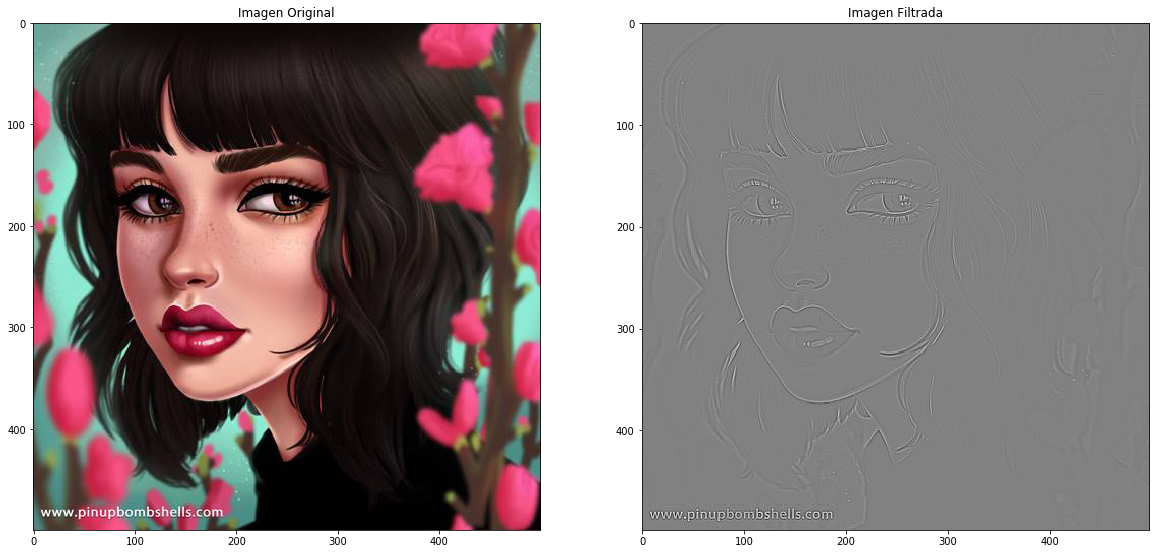

In [29]:
kernel_bordes = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
imagen_bordes = convolucion(imagen_4,kernel_bordes)
cv2.imwrite('./ProblemaExtra1/imagen_bordes.jpg',imagen_bordes)

True

<Figure size 432x288 with 0 Axes>

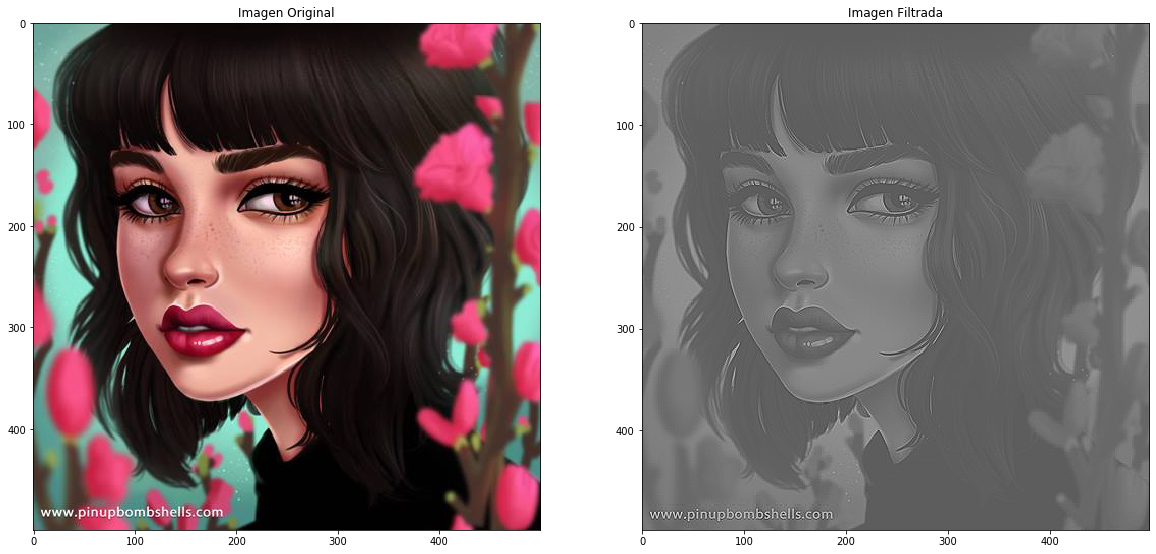

In [30]:
kernel_sharpen = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
imagen_sharpen = convolucion(imagen_4,kernel_sharpen)
cv2.imwrite('./ProblemaExtra1/imagen_sharpen.jpg',imagen_sharpen)

True

<Figure size 432x288 with 0 Axes>

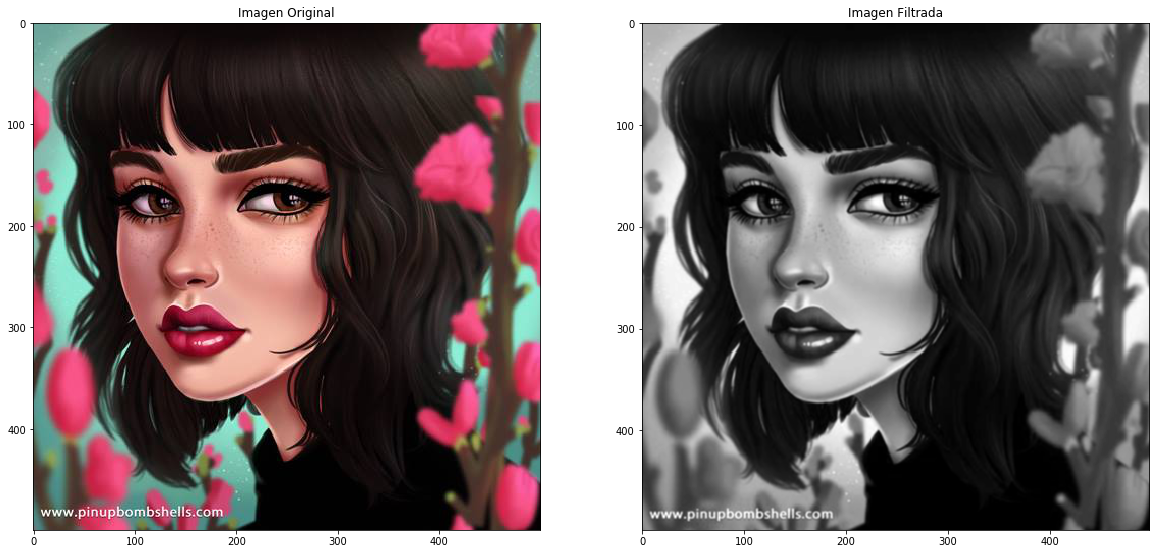

In [31]:
kernel_gaussian_blur = np.array([[1,2,1],[2,4,2],[1,2,1]])
kernel_gaussian_blur = (1/16)*kernel_gaussian_blur
imagen_gaussian_blur = convolucion(imagen_4,kernel_gaussian_blur)
cv2.imwrite('./ProblemaExtra1/imagen_gaussian_blur.jpg',imagen_gaussian_blur)

### Problema Extra - #2:
Implemente una función que sugiera si una imagen en escala de grises requiere o no la ecualización de su histograma, para esto puede utilizar un valor entre 0 a 1, donde 0 significaría que la imagen no requiere ecualización y 1 significaría que la imagen requiere ecualización fuertemente, si el valor es mayor a 0.5 su función debe realizar la ecualización de histograma vista en clase.

In [32]:
imagen_3 = cv2.imread('./ProblemaExtra2/low_contrast.jpg')
print(imagen_3.shape)

(500, 500, 3)


En este caso, se utiliza una función que toma como base lo visto en clase, pero se extiende a imágenes a color (profundidad de 3). Adicionalmente, se establece un indicador de uniformidad para determinar la necesidad de ecualización de la imagen. También se implementa la flexibilidad de ejecutar la ecualización de acuerdo a un parámetro "umbral" configurable. Para la funcionalidad requerida en el problema, el umbral sería 0.5

In [33]:
def ecualizar(imagen,umbral_ecualizacion):
    
    alto,ancho,profundidad = imagen.shape

    ecualizada = np.zeros((alto,ancho,profundidad),dtype=np.uint8) #imagen resultante en escala de grises

    frecuencias = np.zeros((256))

    for i in range(0,alto):
        for j in range(0,ancho):
            for k in range(0,profundidad):
                pixel = int(imagen[i,j,k])
                frecuencias[pixel] = frecuencias[pixel] + 1 # se saca la distribución de frecuencia de cada valor
    
   
    #pdf - histograma
    densidad = np.true_divide(frecuencias,(ancho*alto*profundidad))

    #cdf
    cdf = np.cumsum(densidad,dtype=float)
    
    # cdf uniforme
    cdf_uniforme = np.arange(start=0.0,stop=1.0,step=(1/256))
    
    # Indicador de Necesidad de Ecualización
    indicador_ecualizacion = 2 * np.sum(np.absolute(cdf_uniforme - cdf)/257)
    print("Necesidad de Ecualización: ",np.around(indicador_ecualizacion*100,2),"%")
    print("Umbral para Ecualizar: ",np.around(umbral_ecualizacion*100,2),"%")

    # Necesidad de Ecualización
    ecualizar = indicador_ecualizacion>=umbral_ecualizacion
       
    
    plt.figure()
    f, axarr = plt.subplots(1,2,figsize=(20,5))
    
    # Distribución de Frecuencias de Intensidades
    axarr[0].title.set_text('Histograma Imagen Original')
    axarr[0].hist(imagen.flatten(),256,[0,256], color = 'purple')
    axarr[0].legend((['Frecuencias']), loc = 'upper left')
    
    # Diferencias con Distribución Uniforme
    axarr[1].title.set_text('Comparación de CDFs')
    axarr[1].plot(cdf_uniforme, color = 'green')
    axarr[1].plot(cdf, color = 'red')
    axarr[1].legend(('cdf_uniforme','cdf_imagen'), loc = 'upper left')
    
    plt.show()  
    
    # Ecualización de Histograma si se está por arriba del umbral
    if ecualizar:
        for i in range(0,alto):
            for j in range(0,ancho):
                for k in range(0,profundidad):
                    pixel = int(imagen[i,j,k])
                    newPixel = int(255 * cdf[pixel])
                    ecualizada[i,j,k] = round(newPixel,0)


        plt.figure()
        f, axarr = plt.subplots(1,2,figsize=(20,20))
        axarr[0].title.set_text('Imagen Original')
        axarr[0].imshow(cv2.cvtColor(imagen,cv2.COLOR_BGR2RGB))
        axarr[1].title.set_text('Imagen Ecualizada')
        axarr[1].imshow(cv2.cvtColor(ecualizada,cv2.COLOR_BGR2RGB))   
    
    else:
        print("De acuerdo al umbral, no se ecualizó la imagen")
        ecualizada = imagen
    
    return ecualizada

Necesidad de Ecualización:  43.52 %
Umbral para Ecualizar:  40.0 %


<Figure size 432x288 with 0 Axes>

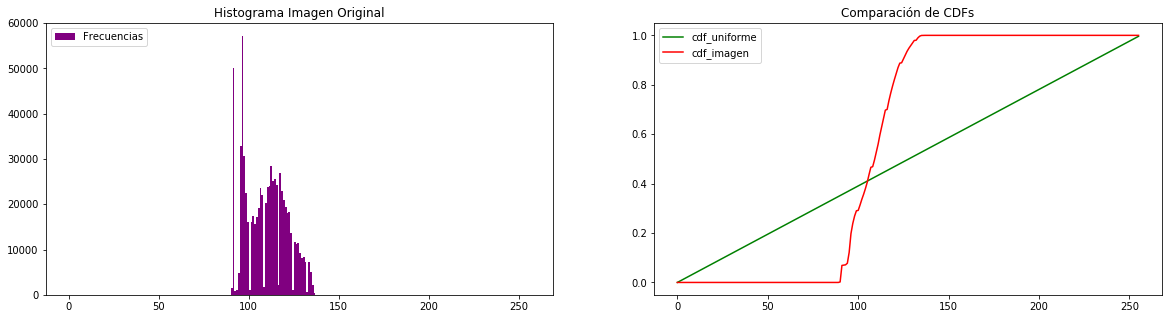

True

<Figure size 432x288 with 0 Axes>

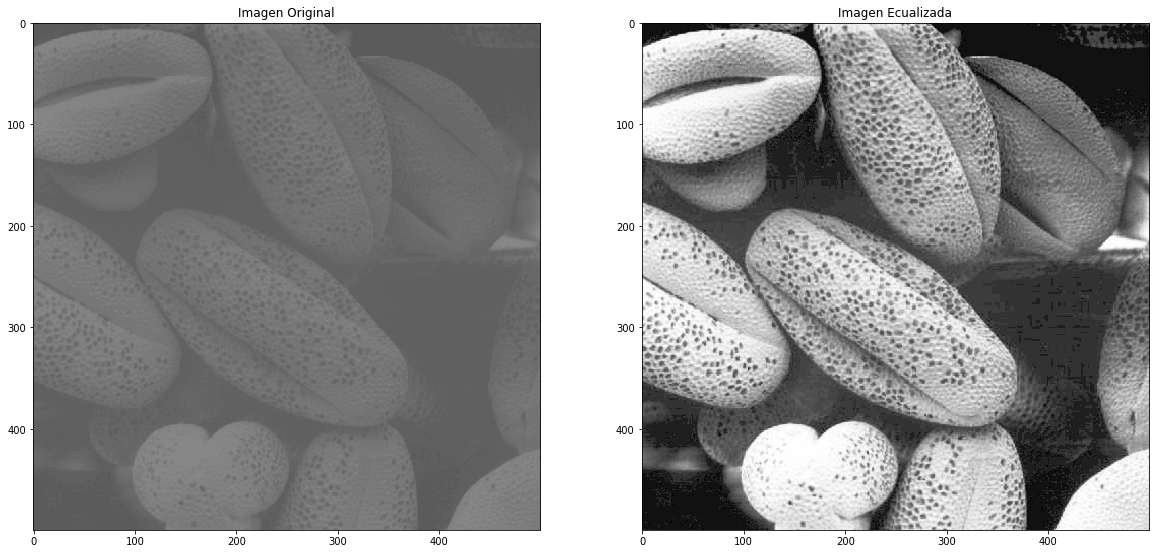

In [34]:
imagen_3_ecualizada = ecualizar(imagen_3,0.4)
cv2.imwrite('./ProblemaExtra2/imagen_ecualizada.jpg',imagen_3_ecualizada)